In [146]:
import numpy as np

In [147]:
class MLP:
    
    def __init__(self,learning_rate=0.01,
                 epochs = 2000,layer_dims= [16,16,32,1]):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.layer_dims = layer_dims
        self.parameters = {}
        self.cache = []
        self.layer_dims = layer_dims
        self.cost = []
        
    def sigmoid(self,z):
        a = 1/(1+np.exp(-z))
        return a
    
    def relu(self,z):
        return np.maximum(z,0)
    
    def initialize_weights(self):
        for i in range(1,len(self.layer_dims)):
            self.parameters['w' + str(i)] = np.random.randn(self.layer_dims[i],self.layer_dims[i-1]) * 0.01
            self.parameters['b' + str(i)] = np.zeros((self.layer_dims[i],1))
            
            
    def forward_propagation(self):
        self.cache=[]
        a_prev = self.x_train 
        for i in range(1,len(self.layer_dims)-1):
            z = np.dot(self.parameters['w' + str(i)],a_prev) + self.parameters['b' + str(i)]
            a = self.relu(z)
            self.cache.append((a_prev,self.parameters['w' + str(i)],self.parameters['b' + str(i)],a))
            a_prev = a
            
        l = len(self.layer_dims) - 1
        z = np.dot(self.parameters['w' + str(l)],a_prev) + self.parameters['b'+str(l)]
        a = self.sigmoid(z)
        self.cache.append((a_prev,self.parameters['w' + str(l)],self.parameters['b' + str(l)],a))
        
    
    def compute_cost(self,a):
        self.cost.append((-1*(np.sum(self.y_train*np.log(a)+(1-self.y_train)*np.log(1-a))))/self.m)
        
    def relu_derivative(self,a):
        a[a <= 0] = 0
        a[a > 1]  = 1
        return a
    
    def linear_activation_backward(self,dA,cache,activation):
        
        (a_prev,w,b,a) = cache
        
        if activation == 'relu':
            dz = dA * self.relu_derivative(a)
            dw = np.dot(dz,a_prev.T)/self.m
            db = np.sum(dz,axis=1,keepdims=True)/self.m
            dA_prev = np.dot(w.T,dz)
        
        if activation == 'sigmoid':
            dz = dA * (1-np.power(a,2))
            dw = np.dot(dz,a_prev.T)/self.m
            db = np.sum(dz,axis=1, keepdims=True)/self.m
            dA_prev = np.dot(w.T,dz)
            
        return (dw,db,dA_prev)
            
    def back_propagation(self):
        l = len(self.layer_dims)
        (a_prev,w,b,a) = self.cache[l-2]
        da = - np.divide(self.y_train,a) + np.divide(1-self.y_train,1-a)
        cache = self.cache[l-2]
        (dw,db,dA_prev) = self.linear_activation_backward(da, cache, 'sigmoid')
        
        self.parameters['w' + str(l-1)] -= self.learning_rate * dw
        self.parameters['b' + str(l-1)] -= self.learning_rate * db
        
        da_temp = dA_prev
        for i in range(l-2,0,-1):
            cache = self.cache[i-1]
            (dw,db,dA_prev) = self.linear_activation_backward(da_temp,cache,'relu')
            self.parameters['w' + str(i)] -= self.learning_rate * dw
            self.parameters['b' + str(i)] -= self.learning_rate * db
            da_temp = dA_prev
            
            
            
    def fit(self,x,y):
        x_train = x/255
        self.m = x_train.shape[0]
        self.x_train = x_train.reshape(x_train.shape[0],-1).T
        
        self.layer_dims.insert(0,self.x_train.shape[0])
        
        self.y_train = y.reshape(1,y.shape[0])
        self.initialize_weights()
        
        for i in range(self.epochs):
            print(f"epoch-{i+1}")
            self.forward_propagation()
            self.compute_cost(self.cache[len(self.layer_dims)-2][3])
            self.back_propagation()
            
            
            

            
            
        

In [148]:
import h5py
hf = h5py.File('train_catvnoncat.h5','r')
X_train = np.array(hf['train_set_x'])

Y_train = np.array(hf['train_set_y'])
model = MLP(epochs=2000)
model.fit(X_train,Y_train)

epoch-1
epoch-2
epoch-3
epoch-4
epoch-5
epoch-6
epoch-7
epoch-8
epoch-9
epoch-10
epoch-11
epoch-12
epoch-13
epoch-14
epoch-15
epoch-16
epoch-17
epoch-18
epoch-19
epoch-20
epoch-21
epoch-22
epoch-23
epoch-24
epoch-25
epoch-26
epoch-27
epoch-28
epoch-29
epoch-30
epoch-31
epoch-32
epoch-33
epoch-34
epoch-35
epoch-36
epoch-37
epoch-38
epoch-39
epoch-40
epoch-41
epoch-42
epoch-43
epoch-44
epoch-45
epoch-46
epoch-47
epoch-48
epoch-49
epoch-50
epoch-51
epoch-52
epoch-53
epoch-54
epoch-55
epoch-56
epoch-57
epoch-58
epoch-59
epoch-60
epoch-61
epoch-62
epoch-63
epoch-64
epoch-65
epoch-66
epoch-67
epoch-68
epoch-69
epoch-70
epoch-71
epoch-72
epoch-73
epoch-74
epoch-75
epoch-76
epoch-77
epoch-78
epoch-79
epoch-80
epoch-81
epoch-82
epoch-83
epoch-84
epoch-85
epoch-86
epoch-87
epoch-88
epoch-89
epoch-90
epoch-91
epoch-92
epoch-93
epoch-94
epoch-95
epoch-96
epoch-97
epoch-98
epoch-99
epoch-100
epoch-101
epoch-102
epoch-103
epoch-104
epoch-105
epoch-106
epoch-107
epoch-108
epoch-109
epoch-110
epoch-11

epoch-834
epoch-835
epoch-836
epoch-837
epoch-838
epoch-839
epoch-840
epoch-841
epoch-842
epoch-843
epoch-844
epoch-845
epoch-846
epoch-847
epoch-848
epoch-849
epoch-850
epoch-851
epoch-852
epoch-853
epoch-854
epoch-855
epoch-856
epoch-857
epoch-858
epoch-859
epoch-860
epoch-861
epoch-862
epoch-863
epoch-864
epoch-865
epoch-866
epoch-867
epoch-868
epoch-869
epoch-870
epoch-871
epoch-872
epoch-873
epoch-874
epoch-875
epoch-876
epoch-877
epoch-878
epoch-879
epoch-880
epoch-881
epoch-882
epoch-883
epoch-884
epoch-885
epoch-886
epoch-887
epoch-888
epoch-889
epoch-890
epoch-891
epoch-892
epoch-893
epoch-894
epoch-895
epoch-896
epoch-897
epoch-898
epoch-899
epoch-900
epoch-901
epoch-902
epoch-903
epoch-904
epoch-905
epoch-906
epoch-907
epoch-908
epoch-909
epoch-910
epoch-911
epoch-912
epoch-913
epoch-914
epoch-915
epoch-916
epoch-917
epoch-918
epoch-919
epoch-920
epoch-921
epoch-922
epoch-923
epoch-924
epoch-925
epoch-926
epoch-927
epoch-928
epoch-929
epoch-930
epoch-931
epoch-932
epoch-933


epoch-1594
epoch-1595
epoch-1596
epoch-1597
epoch-1598
epoch-1599
epoch-1600
epoch-1601
epoch-1602
epoch-1603
epoch-1604
epoch-1605
epoch-1606
epoch-1607
epoch-1608
epoch-1609
epoch-1610
epoch-1611
epoch-1612
epoch-1613
epoch-1614
epoch-1615
epoch-1616
epoch-1617
epoch-1618
epoch-1619
epoch-1620
epoch-1621
epoch-1622
epoch-1623
epoch-1624
epoch-1625
epoch-1626
epoch-1627
epoch-1628
epoch-1629
epoch-1630
epoch-1631
epoch-1632
epoch-1633
epoch-1634
epoch-1635
epoch-1636
epoch-1637
epoch-1638
epoch-1639
epoch-1640
epoch-1641
epoch-1642
epoch-1643
epoch-1644
epoch-1645
epoch-1646
epoch-1647
epoch-1648
epoch-1649
epoch-1650
epoch-1651
epoch-1652
epoch-1653
epoch-1654
epoch-1655
epoch-1656
epoch-1657
epoch-1658
epoch-1659
epoch-1660
epoch-1661
epoch-1662
epoch-1663
epoch-1664
epoch-1665
epoch-1666
epoch-1667
epoch-1668
epoch-1669
epoch-1670
epoch-1671
epoch-1672
epoch-1673
epoch-1674
epoch-1675
epoch-1676
epoch-1677
epoch-1678
epoch-1679
epoch-1680
epoch-1681
epoch-1682
epoch-1683
epoch-1684

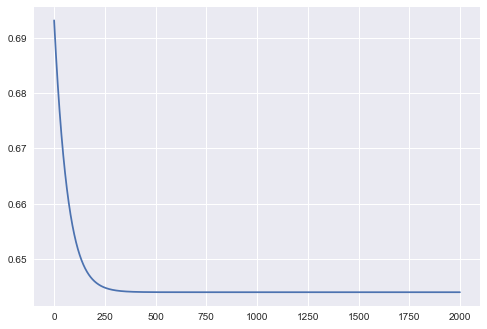

In [155]:
import matplotlib.pyplot as plt
epochs=[i for i in range(model.epochs)]
plt.style.use('seaborn')
plt.plot(epochs,model.cost)

In [151]:
print(min(model.cost))

0.6439736771687827
